In [59]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file into a DataFrame
data = pd.read_csv('../../data/sleep_patterns/V6_student_sleep_patterns.csv')

# Display basic information about the DataFrame
data.info()

# Display summary statistics for numerical columns
data.describe()

# Display the number of missing values in each column
data.isnull().sum()

# Display the unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         500 non-null    int64  
 1   Age                500 non-null    int64  
 2   Gender             500 non-null    object 
 3   University_Year    500 non-null    object 
 4   Sleep_Duration     500 non-null    float64
 5   Study_Hours        500 non-null    float64
 6   Screen_Time        500 non-null    float64
 7   Caffeine_Intake    500 non-null    int64  
 8   Physical_Activity  500 non-null    float64
 9   Sleep_Quality      500 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 39.2+ KB
Student_ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60 

In [60]:
# Drop rows with missing values
data = data.dropna()

# Encode categorical variables
data['Gender'] = data['Gender'].astype('category').cat.codes
data['University_Year'] = data['University_Year'].astype('category').cat.codes

# Separate features and target
X = data.drop(['Sleep_Quality'], axis=1)
y = data['Sleep_Quality']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


The output of the code in the cell at index 3 provides several key metrics and evaluations of the logistic regression model's performance on the student sleep pattern dataset:


1. **Accuracy**:
    ```python
    Accuracy: 0.13
    ```
    This indicates that the logistic regression model correctly predicted the sleep quality for 13% of the test samples.

2. **Classification Report**:
    ```python
    print(classification_report(y_test, y_pred))
    ```
    This provides detailed metrics for each class, including precision, recall, and F1-score. These metrics help to understand the performance of the classifier for each sleep quality category.

3. **Cross-Validation Scores**:
    ```python
    Cross-validation scores: [0.16 0.11 0.12 0.19 0.05]
    Mean cross-validation score: 0.13
    ```
    The cross-validation scores show the accuracy of the model on different subsets of the training data. The mean cross-validation score (0.13) indicates the average performance of the model across these subsets.

Overall, the output suggests that the logistic regression model is not performing well on this dataset, as indicated by the low accuracy and cross-validation scores. This could be due to various reasons such as the choice of features, the model parameters, or the nature of the dataset itself. Further tuning and exploration might be needed to improve the model's performance.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')


Accuracy: 0.13
              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         5
          -2       0.00      0.00      0.00         4
          -1       0.75      0.50      0.60         6
           0       0.20      0.25      0.22         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         9
           4       0.14      0.44      0.22         9
           5       0.17      0.12      0.14         8
           6       0.14      0.08      0.11        12
           7       0.00      0.00      0.00        10
           8       0.06      0.10      0.07        10
           9       0.20      0.33      0.25         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14

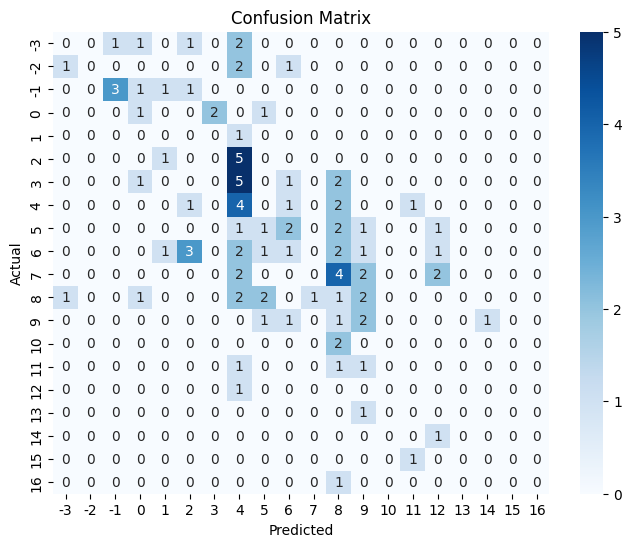

In [62]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

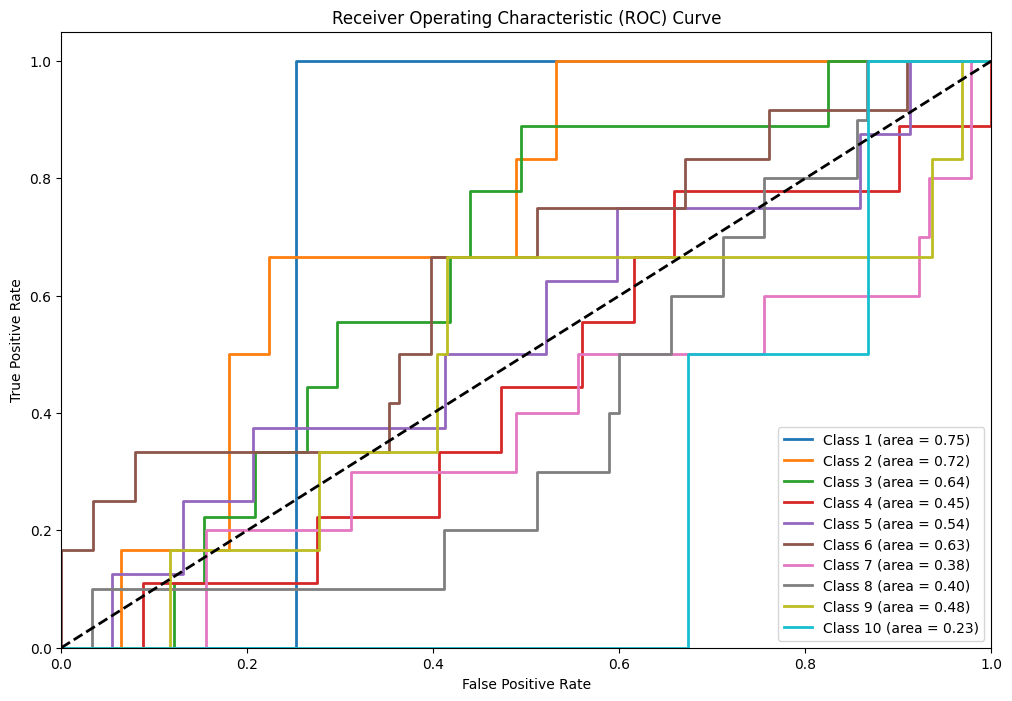

In [63]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n_classes = y_test_binarized.shape[1]

# Compute the probability of each class
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i+1} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

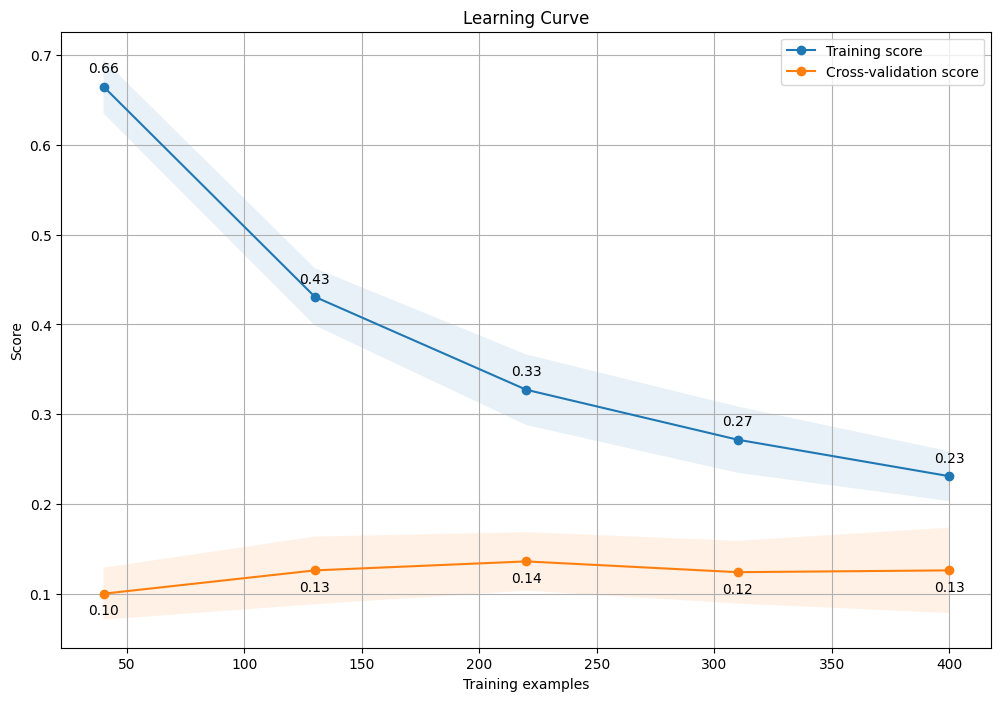

In [64]:
from sklearn.model_selection import learning_curve

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

# Annotate the points with their values
for i in range(len(train_sizes)):
    plt.annotate(f'{train_scores_mean[i]:.2f}', (train_sizes[i], train_scores_mean[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{test_scores_mean[i]:.2f}', (train_sizes[i], test_scores_mean[i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()